In [1]:
#https://www.kaggle.com/datasets/datamunge/sign-language-mnist
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from sklearn.linear_model import LogisticRegression

In [2]:
sign_mnist_df = pd.read_csv('sign_mnist_train.csv')

In [3]:
sign_mnist_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [4]:
sign_mnist_df.shape

(27455, 785)

In [5]:
sign_mnist_df = sign_mnist_df.dropna()
sign_mnist_df[sign_mnist_df.isnull().any(axis=1)].count()

label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64

In [6]:
sign_mnist_df.shape

(27455, 785)

In [7]:
sign_mnist_df=sign_mnist_df.sample(frac=0.3).reset_index(drop=True)
sign_mnist_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,23,212,213,216,217,217,220,220,220,222,...,255,255,255,255,255,255,255,255,255,255
1,20,151,155,159,162,165,169,172,174,176,...,245,234,238,239,240,240,240,240,238,231
2,2,154,156,159,161,163,166,168,170,171,...,243,242,241,241,240,241,241,240,233,206
3,1,192,193,196,198,199,199,200,201,201,...,48,67,106,115,89,113,129,116,90,75
4,11,125,128,133,136,140,144,147,150,152,...,209,208,207,205,204,204,203,202,201,200


In [8]:
sign_mnist_df.shape

(8236, 785)

In [9]:
LOOKUP = {0: 'A', 
          1: 'B', 
          2: 'C', 
          3: 'D', 
          4: 'E',
          5: 'F', 
          6: 'G', 
          7: 'H', 
          8: 'I',
          #no 9
          10: 'K', 
          11: 'L', 
          12: 'M', 
          13: 'N', 
          14: 'O', 
          15: 'P', 
          16: 'Q', 
          17: 'R', 
          18: 'S', 
          19: 'T', 
          20: 'U', 
          21: 'V', 
          22: 'W', 
          23: 'X', 
          24: 'Y'}

In [10]:
def display_image(features, actual_label):
    print("Actual label: ", LOOKUP[actual_label])
    plt.imshow(features.reshape(28,28))

In [11]:
X=sign_mnist_df[sign_mnist_df.columns[1:]]
Y=sign_mnist_df['label'] #<=> ce qu'on veut prédire

In [12]:
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,212,213,216,217,217,220,220,220,222,221,...,255,255,255,255,255,255,255,255,255,255
1,151,155,159,162,165,169,172,174,176,177,...,245,234,238,239,240,240,240,240,238,231
2,154,156,159,161,163,166,168,170,171,173,...,243,242,241,241,240,241,241,240,233,206
3,192,193,196,198,199,199,200,201,201,201,...,48,67,106,115,89,113,129,116,90,75
4,125,128,133,136,140,144,147,150,152,153,...,209,208,207,205,204,204,203,202,201,200


In [13]:
Y.head()

0    23
1    20
2     2
3     1
4    11
Name: label, dtype: int64

Actual label:  X


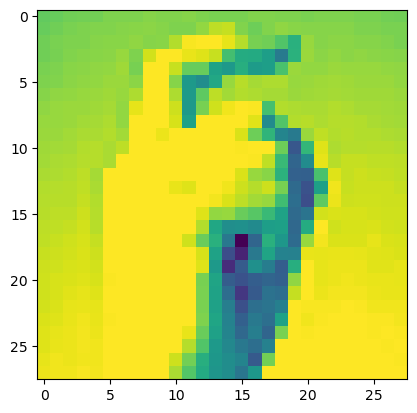

In [14]:
display_image(X.loc[0].values, Y.loc[0])

Actual label:  F


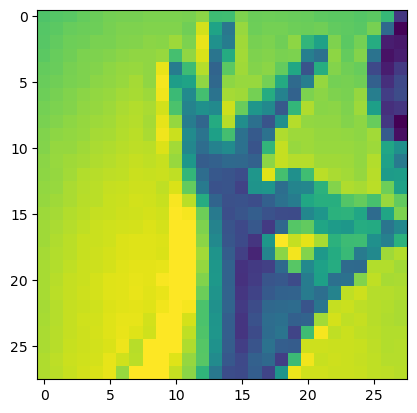

In [15]:
display_image(X.loc[156].values, Y.loc[156])

In [16]:
X=X/255 #range 0 to 1 (its common + speed..) = normalisation
#Each parameter (red, green, and blue) defines the intensity of the color with a value between 0 and 255
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.831373,0.835294,0.847059,0.850980,0.850980,0.862745,0.862745,0.862745,0.870588,0.866667,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.592157,0.607843,0.623529,0.635294,0.647059,0.662745,0.674510,0.682353,0.690196,0.694118,...,0.960784,0.917647,0.933333,0.937255,0.941176,0.941176,0.941176,0.941176,0.933333,0.905882
2,0.603922,0.611765,0.623529,0.631373,0.639216,0.650980,0.658824,0.666667,0.670588,0.678431,...,0.952941,0.949020,0.945098,0.945098,0.941176,0.945098,0.945098,0.941176,0.913725,0.807843
3,0.752941,0.756863,0.768627,0.776471,0.780392,0.780392,0.784314,0.788235,0.788235,0.788235,...,0.188235,0.262745,0.415686,0.450980,0.349020,0.443137,0.505882,0.454902,0.352941,0.294118
4,0.490196,0.501961,0.521569,0.533333,0.549020,0.564706,0.576471,0.588235,0.596078,0.600000,...,0.819608,0.815686,0.811765,0.803922,0.800000,0.800000,0.796078,0.792157,0.788235,0.784314


In [17]:
x_train, x_test, y_train, y_test=train_test_split(X, Y,test_size=0.2)

In [18]:
x_train.shape, y_train.shape

((6588, 784), (6588,))

In [19]:
x_test.shape, y_test.shape

((1648, 784), (1648,))

# LogisticRegression

In [20]:
logistic_model = LogisticRegression(solver='saga', multi_class='auto', max_iter=1000).fit(x_train, y_train)

In [21]:
y_pred = logistic_model.predict(x_test)

In [22]:
print("Accuracy: ",accuracy_score(y_test,y_pred,normalize=True))
print("Precision: ",precision_score(y_test, y_pred, average='weighted'))
print("Recall: ",recall_score(y_test, y_pred, average='weighted'))

Accuracy:  0.9890776699029126
Precision:  0.9892699999229226
Recall:  0.9890776699029126


In [23]:
pred_results = pd.DataFrame({'y_test': y_test,
                             'y_pred': y_pred})
pred_results.sample(20)

,y_test,y_pred
2050,21,21
540,23,23
3400,1,1
2778,20,20
5802,4,4
8020,6,6
543,23,23
1142,19,19
4004,17,17
1078,17,17


## Hyperparameter tuning using GridSearch

In [24]:
from sklearn.model_selection import GridSearchCV
parameters = {'solver': ['saga','sag']}
grid_search = GridSearchCV(LogisticRegression(multi_class='auto', max_iter=1000), parameters, cv=3, return_train_score=True).fit(x_train, y_train)
grid_search.best_params_

{'solver': 'sag'}

In [25]:
y_pred = grid_search.predict(x_test)

In [26]:
print("Accuracy: ",accuracy_score(y_test,y_pred,normalize=True))
print("Precision: ",precision_score(y_test, y_pred, average='weighted'))
print("Recall: ",recall_score(y_test, y_pred, average='weighted'))

Accuracy:  0.9908980582524272
Precision:  0.9910599927442616
Recall:  0.9908980582524272


# NaiveBayes

In [27]:
from sklearn.naive_bayes import GaussianNB

In [28]:
nb_model = GaussianNB().fit(x_train, y_train)

In [29]:
y_pred = nb_model.predict(x_test)

In [30]:
print("Accuracy: ",accuracy_score(y_test,y_pred,normalize=True))
print("Precision: ",precision_score(y_test, y_pred, average='weighted'))
print("Recall: ",recall_score(y_test, y_pred, average='weighted'))

Accuracy:  0.44781553398058255
Precision:  0.5109188606241833
Recall:  0.44781553398058255
